# Titanic Project Kaggle

## 1. Problem Defination :

we have provided weth the data of titanic passenger and their survival and deth. we have to find the probability of the survival of the perticular individual from the test sets by training our model on training sets.

# 2. Data

* The data can be get fromthe kaggle competation.
* the data is structured data
* the work is the classification(binary classification)

# 3. Evaluation

we have to maximize the accuracy of the model to predict the survival of the passenger on test sets

# 4. Features


1. Survival	=  Survival	(0 = No, 1 = Yes)
2. pclass	=  Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex	    =  Sex	
4. Age	    =  Age in years	
5. sibsp	=  of siblings / spouses aboard the Titanic	
6. parch	=  of parents / children aboard the Titanic	
7. ticket	=  Ticket number	
8. fare	    =  Passenger fare	
9. cabin	=  Cabin number	
10. embarked=  Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


* pclass: A proxy for socio-economic status (SES)
  1st = Upper
  2nd = Middle
  3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

  sibsp: The dataset defines family relations in this way...
  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

### Preparing all our Machine Learning Tools ready

In [1]:
#importing importanat librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#this will disply the plots inline with jupyter notebook

#importing some usefull sci-kit learn model which we will use in further process.
# we can import these models and fuction when required but it is good practice to import in one cell.
from sklearn.model_selection import train_test_split # this funtion used to split the data
from sklearn.ensemble import RandomForestClassifier # this is a classification model
from sklearn.linear_model import LinearRegression # thid is another classification model
from sklearn.model_selection import RandomizedSearchCV # this funtion used for tuning hyperparameter 
from sklearn.model_selection import GridSearchCV # this function used to tuning hyperparameter over large parameter set


In [2]:
df = pd.read_csv("train.csv") #importing the data file as a data farme
df #checking data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info() # checking information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from above information we get that our data contain object, float and int data type

In [4]:
df.shape # checking the shape of the data frame

(891, 12)

the data have 12 columns and in total 891 rows( passengers information)

In [5]:
df.isna().sum() # checking the data for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we get to know that our data frame conatain 177 missing values in age column and 687 missing values for cabin numbers

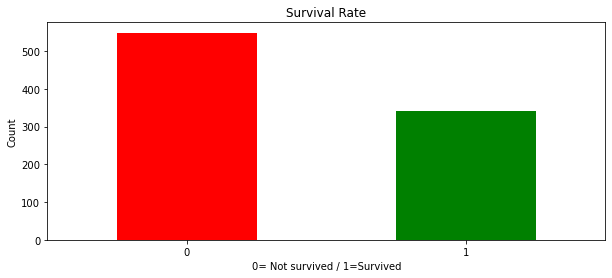

In [6]:
df.Survived.value_counts().plot(kind="bar", 
                                figsize=(10,4),
                               color=["red", "green"]) # checking thye result i.e target of our dafa whic is the survival
plt.title("Survival Rate");
plt.xlabel("0= Not survived / 1=Survived");
plt.ylabel("Count");
plt.xticks(rotation=0);

In [7]:
#we can calculate the ratio of survival rate
df.Survived.value_counts() # get the numbers of survived and non survived
342/549

0.6229508196721312

the survival to non survival ratio is 0.6229

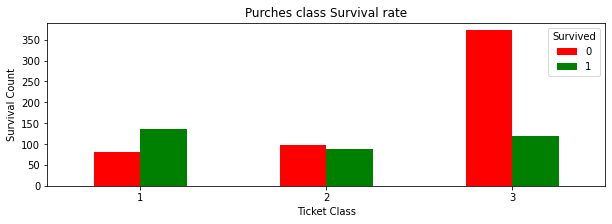

In [8]:
#df.Pclass(df["Survived"] == 0).value_counts().plot(kind="bar", figsize=(10,3))
pd.crosstab(df["Pclass"], df["Survived"]).plot(kind="bar", figsize=(10,3), color=["red", "green"])
plt.title("Purches class Survival rate");
plt.xlabel("Ticket Class");
plt.ylabel("Survival Count");
plt.xticks(rotation=0);

here we can conclude that the most of the passenger on board was from 3rd class out of which male are more who not survived

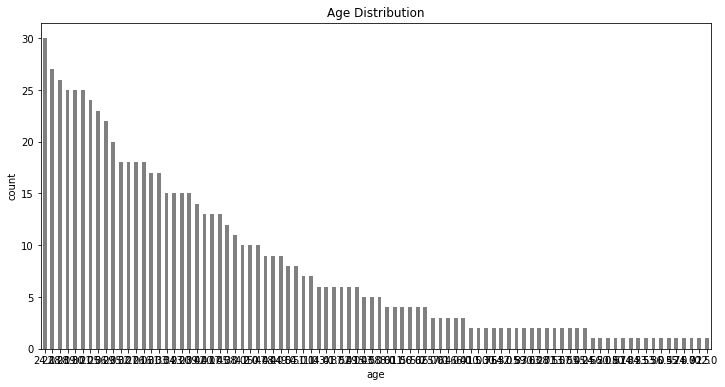

In [9]:
df.Age.value_counts().plot(kind="bar", figsize=(12,6), color="gray")
#df.plot(df.Pclass[df.Survived==0], df.Age[df.Survived==0], kind="scatter", figsize=(12,6))
plt.title("Age Distribution");
plt.xlabel("age");
plt.ylabel("count");

plt.xticks(rotation=0);

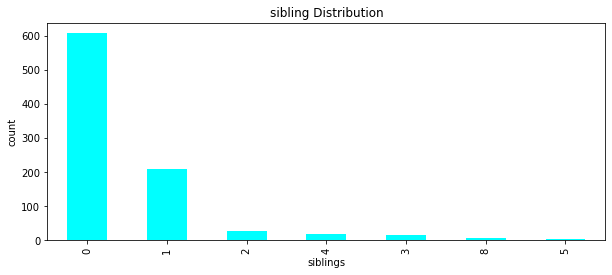

In [10]:
df.SibSp.value_counts().plot(kind="bar", figsize=(10,4), color="cyan")
plt.title("sibling Distribution");
plt.xlabel("siblings");
plt.ylabel("count");

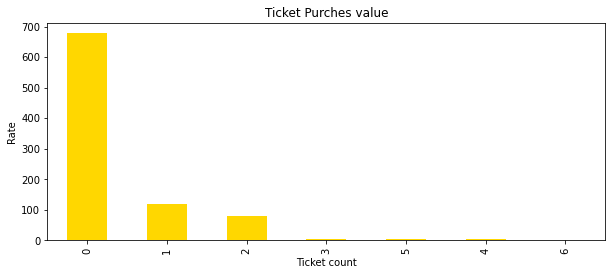

In [11]:
df.Parch.value_counts().plot(kind="bar", figsize=(10,4), color="gold");
plt.title("Ticket Purches value");
plt.xlabel("Ticket count");
plt.ylabel("Rate");

In [12]:

df.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
3101295       6
347088        6
             ..
112379        1
PC 17474      1
315089        1
C.A. 24579    1
11769         1
Name: Ticket, Length: 681, dtype: int64

In [13]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [14]:
#df.scatter(df.Survived, df.)
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
D6             1
A7             1
D11            1
C82            1
D48            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Feature Engineering

now we will make the content of thr df such that we can pass it through the model i.e numerical value.

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_temp = df # making temporary df so we can perform data manupulation and retrew orignal df when required

In [18]:
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_temp.drop("Name", axis=1, inplace=True)


In [20]:
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df_temp.drop("Ticket", axis=1, inplace=True)
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [22]:
df_temp.drop("Cabin", axis=1, inplace=True)
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [23]:
#filling the missing series with missing
df_temp2 = pd.get_dummies(df_temp[["Sex", "Embarked"]])
df_temp2

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [24]:
df_temp.drop("Sex", axis=1, inplace=True)
df_temp.drop("Embarked", axis=1, inplace=True)
df_temp

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [25]:
df_temp["Sex_female"] = df_temp2.Sex_female
df_temp

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,1
888,889,0,3,NaN,1,2,23.4500,1
889,890,1,1,26.0,0,0,30.0000,0


In [26]:
df_temp["Sex_male"] = df_temp2.Sex_male
df_temp["Embarked_C"] = df_temp2.Embarked_C
df_temp["Embarked_Q"] = df_temp2.Embarked_Q
df_temp["Embarked_S"] = df_temp2.Embarked_S
df_temp

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [27]:
df_temp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [28]:
#filling numerical data with thier median here we used mean because we have find the data ranges are spreded over large scare 
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
   
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
       # if not pd.api.types.is_numeric_dtype(content):
          #  df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
          #  df[label] = pd.Categorical(content).codes+1
    
    return df

In [29]:
df_trans = preprocess_data(df_temp)

In [30]:
df_trans.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Age_is_missing    0
dtype: int64

In [31]:
df_trans

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_is_missing
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,False
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,False
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,False
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,False
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1,False
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1,False
888,889,0,3,28.0,1,2,23.4500,1,0,0,0,1,True
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0,False


now our data has no NAN we can proceed with model fitting 

### Splitting the data into train and test i.e features and label

In [32]:
x = df_trans.drop("Survived", axis=1)
y = df_trans["Survived"]

In [33]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_is_missing
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,False
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,False
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,False
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,False
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1,False
887,888,1,19.0,0,0,30.0000,1,0,0,0,1,False
888,889,3,28.0,1,2,23.4500,1,0,0,0,1,True
889,890,1,26.0,0,0,30.0000,0,1,1,0,0,False


In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
#spliting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((712, 12), (712,), (179, 12), (179,))

In [37]:
#using liner Regression as model 1
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.40781647627102424

In [38]:
#using Random Forest classifier as model 2
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.8268156424581006

here we canclude that the score of Random forest classifier as model is high so we will proceed with this and maximize the accuracy by tuning the hyperparameter

# tuning hyperparameter 

In [39]:
#making grid of parameter to pass in randomized search cv and grid search cv
grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid,
                           n_iter=20,
                           verbose=True)
rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rfc.best_params_

{'n_estimators': 810,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [41]:
rs_rfc.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
y_test

246    0
651    1
466    0
691    1
690    1
      ..
459    0
625    0
390    1
575    0
439    0
Name: Survived, Length: 179, dtype: int64

In [55]:
model_3 = RandomForestClassifier(n_estimators = 810,
                                min_samples_split= 14,
                                min_samples_leaf = 1,
                                max_depth = 10)
model_3.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=14, n_estimators=810)

In [56]:
model_3.score(x_test, y_test)

0.8212290502793296

using randomized search cv we have improve the model accuracy by 3% we can further improve the model accuracy using grid search cv

In [60]:
grid_2 = { "n_estimators": [100,500,1000,1200,1500],
        "max_depth": [10,20, 30, 40,50],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6,8,10],
        "min_samples_leaf": [2, 4, 6, 8, 10]}

In [ ]:
%%time
gs_rfc = GridSearchCV(RandomForestClassifier(),
                     param_grid=grid_2,
                     cv=5,
                     verbose=True)
gs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


In [47]:
  gs_rfc.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [48]:
model_4 = RandomForestClassifier(n_estimators = 1000,
                                min_samples_split= 6,
                                min_samples_leaf = 4,
                                max_depth = 20,
                                max_features = "auto")
model_4.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=1000)

In [52]:
model_4.score(x_test, y_test)

0.8156424581005587

with grid search cv we can get best prame which score more but due to device limitaion we have used only this much of computing power.

we can further improve oour score by hand hyperparameter tuning.

In [50]:
model_5 = RandomForestClassifier(n_estimators = 1000,
                                min_samples_split= 2,
                                min_samples_leaf = 2,
                                max_depth = 30,
                                max_features = "auto")
model_5.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=1000)

In [51]:
model_5.score(x_test, y_test)

0.8100558659217877